# ENPM 673 Perception for Autonomous Robots

# Assignment 1

Question 2:
Two files of 2D data points are provided in the form of CSV files (Dataset_1 and Dataset_2). The data
represents measurements of a projectile with different noise levels and is shown in figure 1. Assuming that
the projectile follows the equation of a parabola,

 Find the best method to fit a curve to the given data for each case. You have to plot the data and your
best fit curve for each case. Submit your code along with the instructions to run it.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
data1 = pd.read_csv(r"C:\Users\Kartik\Downloads\data_1.csv")
print(data1)

       x          y
0      0 -71.218000
1      2 -34.769000
2      4 -55.372129
3      6 -38.338387
4      8 -62.190773
5     10 -30.225288
6     12 -49.797932
7     14 -61.455705
8     16 -47.079607
9     18 -54.732637
10    20 -53.472796
11    22 -30.241084
12    24 -26.457501
13    26  -3.743046
14    28  -2.778720
15    30 -31.501523
16    32  -7.964455
17    34  -3.019515
18    36 -38.382704
19    38 -37.421022
20    40 -14.275469
21    42 -20.853045
22    44 -14.213749
23    46 -25.026582
24    48   2.005456
25    50  -5.974635
26    52 -19.537854
27    54  -1.322202
28    56  18.985321
29    58  12.671715
..   ...        ...
220  440  -5.283149
221  442 -12.120479
222  444  -6.868937
223  446  10.127475
224  448 -25.669241
225  450  11.195914
226  452 -13.195060
227  454  11.594837
228  456 -22.234394
229  458 -26.699754
230  460  -1.740243
231  462 -13.712861
232  464 -31.694608
233  466  -6.470483
234  468   1.973513
235  470 -10.406620
236  472 -14.927881
237  474 -50.926272


In [4]:
data1 = data1.values.tolist()
x_data1 =[]
y_data1 =[]
for i in range(len(data1)):
    x_data1.append(data1[i][0])
    y_data1.append(data1[i][1])

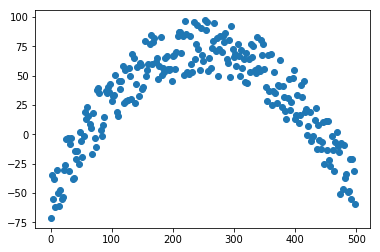

In [8]:
plt.plot(x_data1,y_data1,'o')


In [10]:
def powList(x,n):
    xpow = []
    for i in range(len(x)):
        xpow.append(pow(x[i],n))    
    return xpow
n= len(x_data1)
X = np.array([[n,sum(x_data1),sum(powList(x_data1,2))],
     [sum(x_data1),sum(powList(x_data1,2)),sum(powList(x_data1,3))],
     [sum(powList(x_data1,2)),sum(powList(x_data1,3)),sum(powList(x_data1,4))]])
xy = [np.dot(x_data1,y_data1)]
x2y = [np.dot(powList(x_data1,2),y_data1)]
Y = np.array([[(sum(y_data1))],[(sum(xy))],[(sum(x2y))]])
print(X)
print(Y)
A = np.dot(np.linalg.inv(X),Y)
print(A) 

[[2.50000000e+02 6.22500000e+04 2.07085000e+07]
 [6.22500000e+04 2.07085000e+07 7.75012500e+09]
 [2.07085000e+07 7.75012500e+09 3.09383333e+12]]
[[8.05758633e+03]
 [2.03477865e+06]
 [5.07220312e+08]]
[[-5.18388349e+01]
 [ 1.00597883e+00]
 [-2.00907296e-03]]


In [11]:
y_pred = A[2]*powList(x_data1,2)+A[1]*x_data1+A[0]
print(len(y_pred))

250


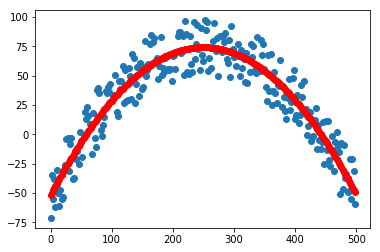

In [12]:
plt.plot(x_data1,y_data1,'o')

plt.plot(x_data1,y_pred,'o', color='red')
plt.show()